In [29]:
from animate import anim 
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd

In [30]:
model = PINNs()
model.load_state_dict(torch.load('4_new_interval/model_weights.pth', map_location=torch.device('cpu')))

geom = Rectangle(x_max = 8, y_max = 4,
                      t_min=0, t_max=160)    # le domaine de résolution

In [31]:

L = 0.05
V0 = 1.
Re = 100

lr = 1e-3

##### Le code ###############################
###############################################

# La data
df = pd.read_csv('data.csv')


# On adimensionne la data
df_modified = df[(df['Points:0']>= -0.07) & (df['Points:1']>= -0.1) & (df['Points:1']<= 0.1)]
x, y, t = np.array(df_modified['Points:0']), np.array(df_modified['Points:1']), np.array(df_modified['Time'])
u, v, p = np.array(df_modified['Velocity:0']), np.array(df_modified['Velocity:1']), np.array(df_modified['Pressure'])
x_ad = (x-x.min())/L
y_ad = (y-y.min())/L
t_ad = t*V0/L                 # Nouvel adimensionnement

p_ad = p/(V0**2)
u_ad = u/V0
v_ad = v/V0
print(f"u {u.max()}")

X = np.array([x_ad, y_ad, t_ad], dtype=np.float32).T

u 1.5052


In [33]:
X_pred = torch.tensor(X, dtype=torch.float32)

In [ ]:
U_pred = model(X_pred)

In [ ]:
x, y, t = X_pred.detach().numpy()[:,0], X_pred.detach().numpy()[:,1], X_pred.detach().numpy()[:,2]
u, v, p = U_pred.detach().numpy()[:,0], U_pred.detach().numpy()[:,1], U_pred.detach().numpy()[:,2]

In [26]:
time = torch.linspace(0, 160, 100)
X_pred = torch.zeros(30000*100, 3)
for k, t in enumerate(time) :
    X_pred[k*30000:(k+1)*30000, :2] = geom.generate_random(30000)[:,:2]
    X_pred[k*30000:(k+1)*30000, 2] = t
    
U_pred = model(X_pred)
x, y, t = X_pred.detach().numpy()[:,0], X_pred.detach().numpy()[:,1], X_pred.detach().numpy()[:,2]
u, v, p = U_pred.detach().numpy()[:,0], U_pred.detach().numpy()[:,1], U_pred.detach().numpy()[:,2]
norme_vitesse = np.sqrt(u**2 + v**2)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


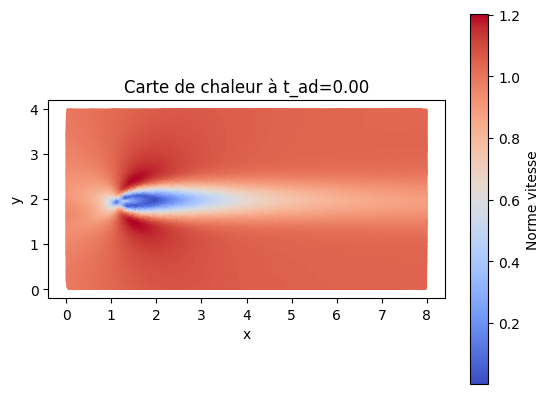

In [27]:
with torch.no_grad():
    anim('supervised.gif', x, y, t, norme_vitesse)